In [36]:
from calibration import * 
import scipy
import torch 
import torchvision.transforms.functional as TF

import torchvision
import torchvision.transforms as transforms

import numpy as np


transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

testsetv1 = torchvision.datasets.CIFAR10(root="/data/sgarg2/cifar/", train=False, download=False, transform=transform_test)
testloaderv1 = torch.utils.data.DataLoader(testsetv1, batch_size=200, shuffle=False, num_workers=2)




In [37]:
agg_labels = []

for _, labels in testloaderv1: 
    agg_labels.append(labels.numpy())

In [38]:
agg_labels =  np.concatenate(agg_labels,axis=0)

In [39]:
probs = np.load("L114.npy")

In [40]:
np.mean(np.argmax(probs, axis = 1) == agg_labels)

0.7297

In [45]:

calibrator = TempScaling()
probs = scipy.special.softmax(probs, axis=-1)

probs = probs / np.sum(probs,axis=-1).reshape((-1, 1))


In [46]:
calibrator.fit(probs, agg_labels)

Before temperature - NLL: 1.737, ECE: 0.379
Optimal temperature: 0.264
After temperature - NLL: 1.048, ECE: 0.021


(array([  14.,   74.,  140.,  309.,  357.,  371.,  426.,  532.,  723.,
        7054.]),
 array([0.23467539, 0.31120786, 0.3877403 , 0.46427277, 0.5408052 ,
        0.6173377 , 0.6938702 , 0.7704026 , 0.8469351 , 0.9234675 ,
        1.        ], dtype=float32),
 <BarContainer object of 10 artists>)

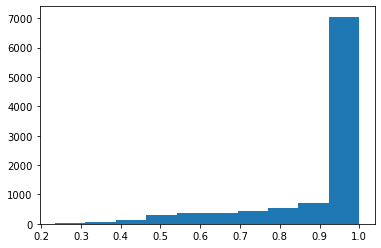

In [23]:
from scipy.special import softmax
import matplotlib.pyplot as plt 

plt.hist(np.max(scipy.special.softmax(probs, axis=-1),axis=-1))

In [35]:
np.sum(probs,axis=-1)

array([1.        , 0.99999994, 1.        , ..., 0.99999994, 1.        ,
       1.0000001 ], dtype=float32)